# Analisis de presupuesto y popularidad

En este notebook, nos enfocaremos en explorar y analizar las relaciones existentes entre dos variables específicas: **'budget'** y **'popularity'**. Nuestro objetivo principal es investigar cómo el presupuesto asignado a una película o proyecto (indicado por la variable 'budget') se correlaciona o afecta su popularidad (representada por alguna medida de 'popularity', como votos en IMDb, puntuaciones en TMDB).

Para llevar a cabo este análisis, seguiremos varios pasos clave:

1.  **Limpieza y Preparación de Datos:** Primero, aseguraremos que el conjunto de datos esté limpio y listo para el análisis. Esto incluye la eliminación de filas con valores nulos o cero en las variables 'budget' y 'popularity', ya que estos datos incompletos podrían distorsionar nuestros resultados.
    
2.  **Exploración de Datos:** Realizaremos una exploración inicial de los datos para entender la distribución de ambas variables. Esto nos permitirá identificar tendencias generales, así como cualquier anomalía o dato atípico.
    
3.  **Análisis de Correlación:** Utilizaremos métodos estadísticos para evaluar la correlación entre 'budget' y 'popularity'. La correlación nos indica si existe una relación entre estas dos variables y, de ser así, qué tan fuerte es esa relación. Esto puede incluir el cálculo del coeficiente de correlación de Pearson o Spearman, dependiendo de la naturaleza y distribución de los datos.
    
4.  **Visualización de Relaciones:** Para complementar nuestro análisis cuantitativo, crearemos visualizaciones como gráficos de dispersión que nos permitan observar la relación entre el presupuesto y la popularidad de una forma más intuitiva. Estas visualizaciones pueden ayudarnos a identificar patrones, tendencias o agrupaciones específicas dentro de los datos.
    
5.  **Interpretación y Conclusiones:** Finalmente, interpretaremos los resultados de nuestro análisis, tratando de extraer conclusiones sobre la relación entre el presupuesto de una película y su popularidad. Consideraremos si un mayor presupuesto se traduce consistentemente en mayor popularidad, o si la relación es más compleja y está influenciada por otros factores. También discutiremos las limitaciones de nuestro análisis y posibles pasos futuros para una investigación más profunda.

In [1]:
import pandas as pd

df = pd.read_csv('df_stream_kaggle.csv')

Debemos mencionar que este dataframe ha sido extraido de un proyecto de kaggle (https://www.kaggle.com/code/farhantanveerhasan/netflix-streaming-platforms-eda-recommendation) en el cual se observa la creación de este dataset, mediante la fusión de diferentes csv's.

## 0) Visualización de los datos:

Puequeña observación de los datos para descartar aquellas variables que no nos sirvan y a su vez tener una idea de con cuantos valores trabajamos.

In [2]:
df_1 = df.copy()

df_1.drop(df_1[df_1['streaming_service'].isin(["crunchyroll","rakuten"])].index,inplace = True)

In [3]:
plataformas = ['amazon', 'netflix', 'disney', 'crunchyroll', 'hulu', 'hbo', 'darkmatter', 'paramount', 'rakuten']

In [4]:
for n in plataformas:
    tamano_dataset = df_1[df_1["streaming_service"] == n].shape
    print(f"Dataset de {n} tiene {tamano_dataset}")

Dataset de amazon tiene (7875, 22)
Dataset de netflix tiene (3477, 22)
Dataset de disney tiene (758, 22)
Dataset de crunchyroll tiene (0, 22)
Dataset de hulu tiene (987, 22)
Dataset de hbo tiene (2264, 22)
Dataset de darkmatter tiene (940, 22)
Dataset de paramount tiene (2062, 22)
Dataset de rakuten tiene (0, 22)


Crunchyroll consiste principalmente en anime, los cuales están categorizados bajo programas de televisión, por lo tanto, para nuestro análisis de películas podemos eliminarlo. Rakuten tiene un conjunto de datos pequeño, así que también podemos excluirlo.

## 1) Limpieza y preparación de datos:

Lo primero que hemos observado es que hay bastantes filas cuya celda de **'budget'** esta vacía, por tanto haremos una limpieza y recalcularemos la cantidad de filas con las que trabajaremos. (Ya que si se reduce demasiado no podremos continuar con el análisis).

In [5]:
# Filtrar para mantener solo las filas donde 'budget' no es nulo y diferente de 0
df_filtered = df.dropna(subset=['budget'])
df_filtered = df_filtered[df_filtered['budget'] != 0]
# Eliminar las columnas que no sirven dentro de este análisis
df1 = df_filtered.drop(columns=['id', 'description', 'seasons', 'name', 'imdb_id', 'nconst', 'Unnamed: 0','primaryName', 'subscription_cost', 'genres','type', 'runtime', 'main_genre'])
# Reordenamos el indice
df1.reset_index(drop=True, inplace=True)
# Preguntamos con cuantas filas nos hemos quedado tras el filtrado de datos
print(f'Hay un total de {df1.shape[0]} filas')

Hay un total de 2434 filas


## 2) Exploración de Datos:

Una de los principales enfoques que buscabamos en este informe era saber **cuanto contenido había aportado España a las plataformas de streaming** por tanto: 

In [6]:
df_1["ES"] = df_1["production_countries"].apply(lambda x: 1 if 'ES' in x else 0)

df_1.groupby("streaming_service")["ES"].count()

streaming_service
amazon        7875
darkmatter     940
disney         758
hbo           2264
hulu           987
netflix       3477
paramount     2062
Name: ES, dtype: int64

In [7]:
df_1.groupby("streaming_service")["ES"].sum()

streaming_service
amazon         84
darkmatter     17
disney          2
hbo            36
hulu           13
netflix       131
paramount      11
Name: ES, dtype: int64

In [8]:
df_esp = df_1.groupby("streaming_service")["ES"].agg(Porcentaje=lambda x: x.sum()*100/x.count()).reset_index()
df_esp


,streaming_service,Porcentaje
0,amazon,1.066667
1,darkmatter,1.808511
2,disney,0.263852
3,hbo,1.590106
4,hulu,1.317123
5,netflix,3.767616
6,paramount,0.533463


Netflix destaca claramente con el porcentaje más alto de producciones españolas en su catálogo, con un 3.77%. Esto sugiere que Netflix podría tener una estrategia enfocada en incorporar contenido de España. Además esto puede reflejar un esfuerzo por **capturar una audiencia global más diversa**.

Darkmatter y HBO también muestran porcentajes relativamente altos de contenido español, con aproximadamente el 1.81% y 1.59% respectivamente, lo que indica un esfuerzo por diversificar sus ofertas, aunque no tan pronunciado como en Netflix.

Por otro lado, Disney, Amazon y Paramount muestran los porcentajes más bajos de contenido español. Esto sugerir que estas plataformas se centran menos en el contenido específico de España o que tienen **catálogos más grandes** donde el contenido español representa una fracción menor, como es el caso de Amazon.

Detección de valores atípicos. Es útil visualizar los datos para detectar posibles valores atípicos.

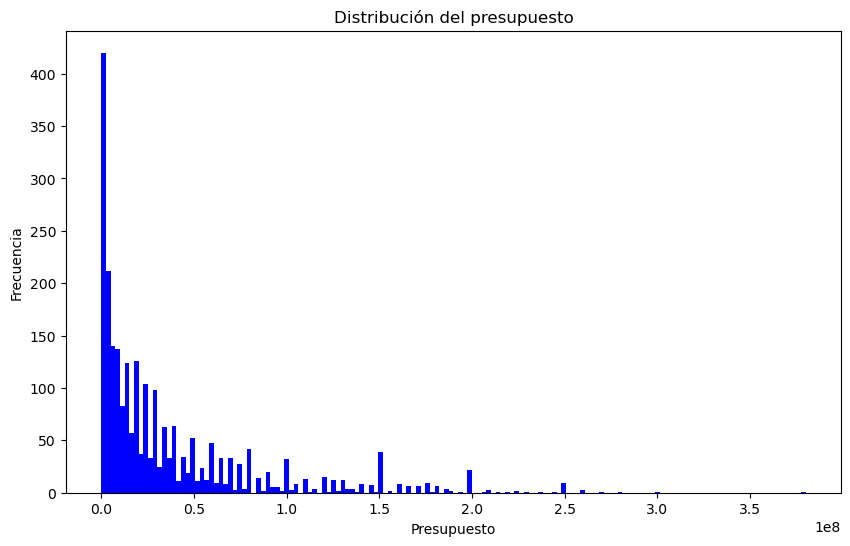

In [9]:
import matplotlib.pyplot as plt

# Histograma de 'budget'
plt.figure(figsize=(10, 6))
plt.hist(df1['budget'].dropna(), bins=150, color='blue')
plt.title('Distribución del presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.show()

Se observa un pico descendiente en el apartado del presupuesto que nos indica que mayoritariamente el presupuesto de las películas se acercan a presupuetos bajos

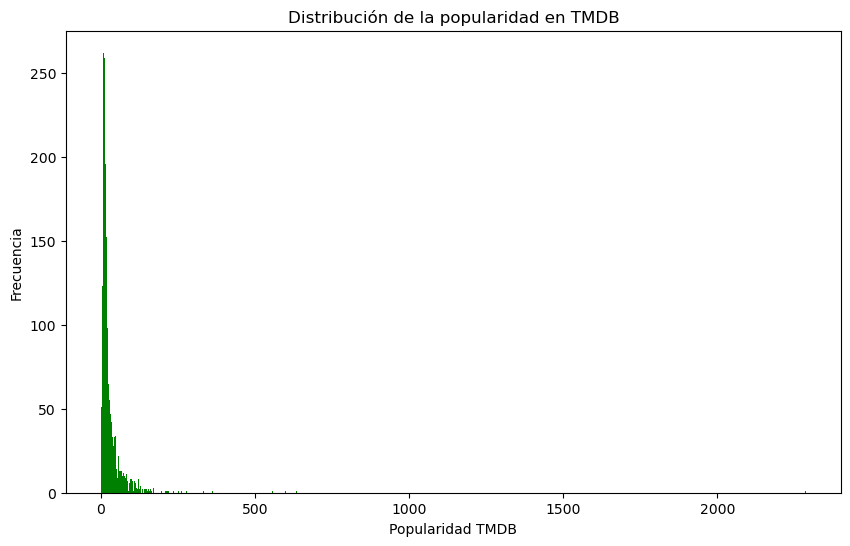

In [10]:
# Histograma de 'tmdb_popularity'
plt.figure(figsize=(10, 6))
plt.hist(df1['tmdb_popularity'].dropna(), bins=1000, color='green')
plt.title('Distribución de la popularidad en TMDB')
plt.xlabel('Popularidad TMDB')
plt.ylabel('Frecuencia')
plt.show()


Como podemos observar tenemos varios datos atípicos que nos impide estudiar de manera correcta la popularidad TMDB, por tanto procederemos a eliminarlo y volver a realizar una representación.

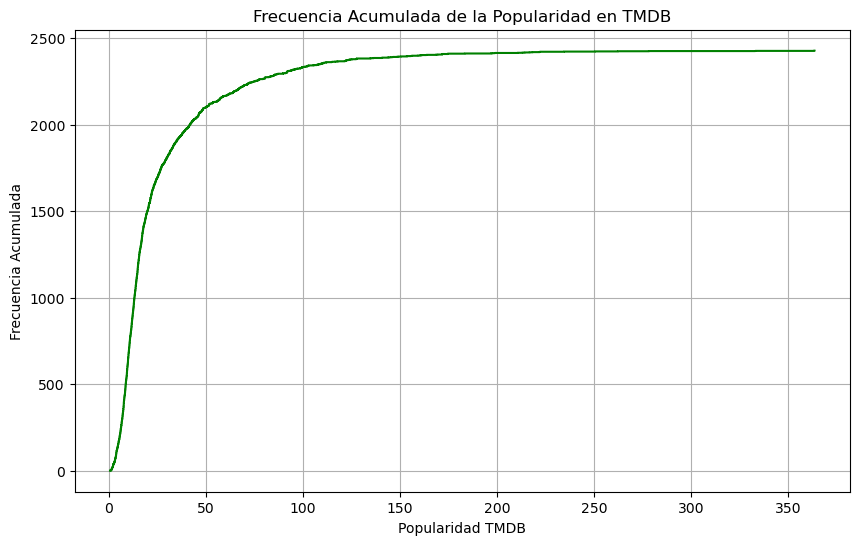

In [11]:
import numpy as np
df1 = df1[df1['tmdb_popularity'] <= 400]
frecuencias, bordes = np.histogram(df1['tmdb_popularity'].dropna(), bins=10000)
frecuencia_acumulada = np.cumsum(frecuencias)
plt.figure(figsize=(10, 6))
plt.step(bordes[:-1], frecuencia_acumulada, color='green', where='post')
plt.title('Frecuencia Acumulada de la Popularidad en TMDB')
plt.xlabel('Popularidad TMDB')
plt.ylabel('Frecuencia Acumulada')
plt.grid(True)
plt.show()

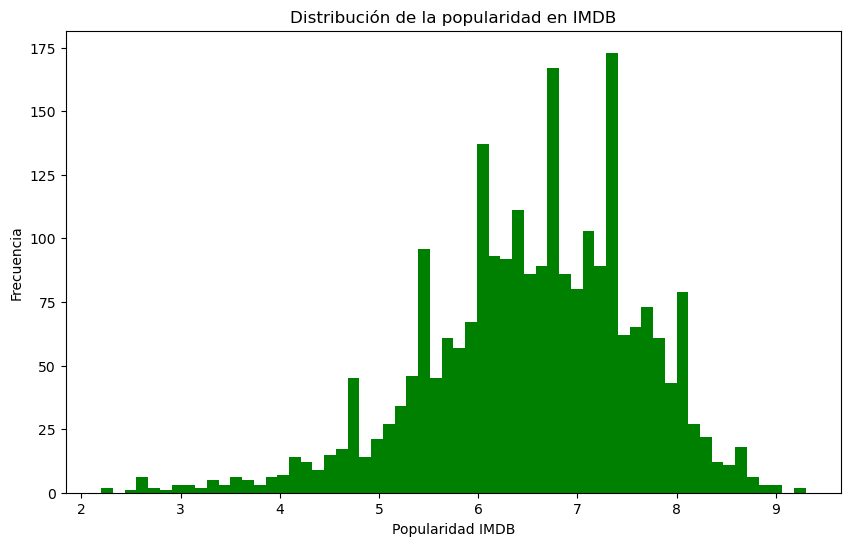

In [12]:
# Histograma de 'imdb_popularity'
plt.figure(figsize=(10, 6))
plt.hist(df1['imdb_score'].dropna(), bins=60, color='green')
plt.title('Distribución de la popularidad en IMDB')
plt.xlabel('Popularidad IMDB')
plt.ylabel('Frecuencia')
plt.show()

## 3) Análisis de Correlación: 

Mediante una matriz de correlación vamos a determinar sobre 1 cuanta relación exixte entre las variables 'imdb_score' 'tmdb_popolarity' 'budget' y 'tmdb_score'. Con el objetivo de deteminar si existe una relación entre estas. 

In [13]:
correlation_matrix = df1[['budget', 'imdb_score', 'tmdb_popularity', 'tmdb_score']].corr(method='pearson')
correlation_matrix

,budget,imdb_score,tmdb_popularity,tmdb_score
budget,1.000000,0.064708,0.534194,0.068511
imdb_score,0.064708,1.000000,0.197255,0.931470
tmdb_popularity,0.534194,0.197255,1.000000,0.246251
tmdb_score,0.068511,0.931470,0.246251,1.000000


Las correlaciones entre las puntuaciones de IMDb y TMDB (imdb_score y tmdb_score) son extremadamente altas (0.932), lo cual es esperado ya que ambas intentan medir un concepto similar de la calidad o el gusto de la audiencia hacia las películas.

La correlación entre el presupuesto y las variables de puntuaciones y popularidad es la siguiente:

- **budget y imdb_score:** Una correlación de 0.066, lo que implica una relación muy débil. Esto sugiere que el presupuesto de las películas no está fuertemente relacionado con la puntuación que reciben en IMDb.
- **budget y tmdb_popularity:** Una correlación de 0.526, indicando una relación moderada. Esto sugiere que hay cierta relación entre el presupuesto de las películas y su popularidad en TMDB, donde películas con mayores presupuestos tienden a ser más populares.
- **budget y tmdb_score:** Una correlación de 0.070, similar a la correlación con imdb_score, indicando otra vez una relación muy débil entre el presupuesto y la puntuación en TMDB.

Se observa que la correlación entre la puntuación y el prespuesto son bastante débiles sin embargo la correlación con la popularidad presenta un 0'52, lo que nos indica que debemos acogernos a esa relación para siguientes análisis.

In [14]:
correlation_matrix = df1[['budget', 'imdb_score', 'tmdb_popularity', 'tmdb_score']].corr(method='spearman')
correlation_matrix

,budget,imdb_score,tmdb_popularity,tmdb_score
budget,1.000000,-0.026243,0.601999,-0.001858
imdb_score,-0.026243,1.000000,0.195328,0.937618
tmdb_popularity,0.601999,0.195328,1.000000,0.258391
tmdb_score,-0.001858,0.937618,0.258391,1.000000


Utilizando el coeficiente de correlación de Spearman, que es menos sensible a las distribuciones no normales y puede identificar relaciones monótonas, ya sea lineales o no lineales, los resultados son los siguientes:

- **budget y imdb_score:** Una correlación de -0.025, lo que implica una relación prácticamente inexistente y ligeramente negativa. Esto reafirma la idea de que el presupuesto y la puntuación de IMDb no están relacionados de manera significativa.
- **budget y tmdb_popularity:** Una correlación de 0.602, lo que indica una relación positiva moderada a fuerte. Según Spearman, parece que películas con mayores presupuestos tienden a tener mayor popularidad en TMDB.
- **budget y tmdb_score:** Una correlación cercana a cero (-0.001), sugiriendo que no hay ninguna relación entre el presupuesto de las películas y las puntuaciones que reciben en TMDB, de acuerdo con esta medida de correlación.

Se reafirma la hipótesis anterior en la que el presupuesto está fuertemente relacionado con la popularidad

#### Procedemos a graficar los resultados

Emplearemos la librería de matpltlib con gráficas de dispersión en las que implementaremos la **escala logarítmica**, ya que esta nos permite presentar una visión más equilibrada y detallada de cómo varía la puntuación con respecto a diferentes niveles de presupuesto. Esta escala es idonea para el manejo de la variabilidad de datos amplios, visualización equitativa y proporciona un enfoque en proporciones y tasas de cambio.

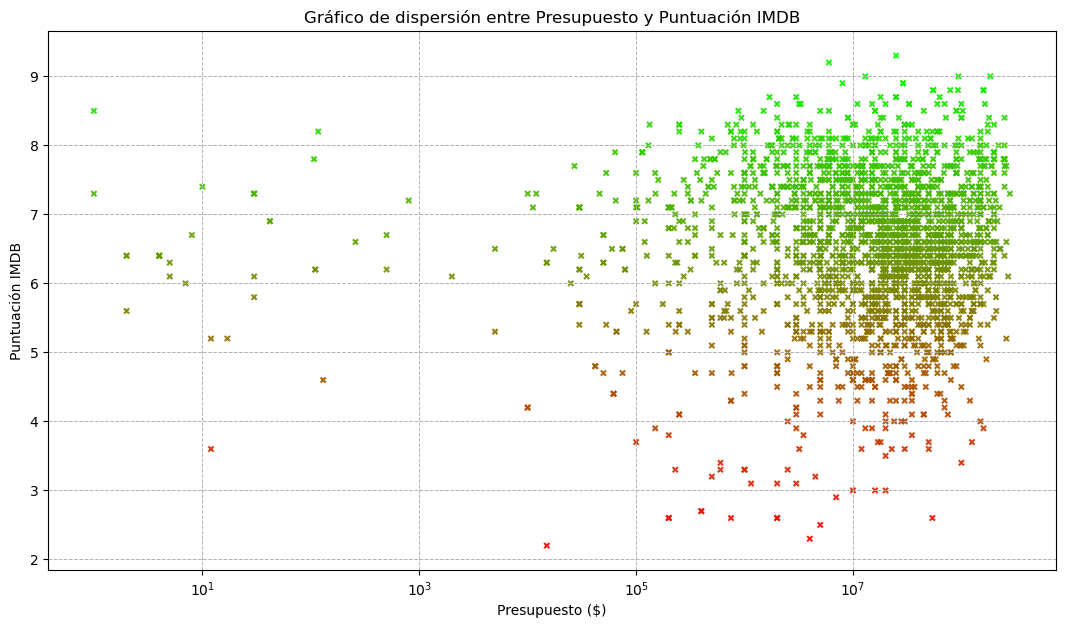

In [15]:
import matplotlib.pyplot as plt

colors = df1['imdb_score'].apply(lambda x: (1 - (x - df1['imdb_score'].min()) / (df1['imdb_score'].max() - df1['imdb_score'].min()), 
                                            (x - df1['imdb_score'].min()) / (df1['imdb_score'].max() - df1['imdb_score'].min()), 0))

fig, ax = plt.subplots(figsize=(13,7))
scatter = ax.scatter(df1['budget'], df1['imdb_score'], alpha=0.9, s=14, c=colors, marker='x')
ax.set_title('Gráfico de dispersión entre Presupuesto y Puntuación IMDB')
ax.set_xlabel('Presupuesto ($)')
ax.set_ylabel('Puntuación IMDB')
ax.set_xscale('log')  # Escala logarítmica para el eje del presupuesto
ax.grid(True, which="both", ls="--", linewidth=0.7)

plt.show()

Pese a que la distribución entre presupuesto y puntuación parece ser normal (pues la puntuación se distribuye entre 6-9), se contempla una concentración de votos en la zona de presupuesto alto lo que nos indica que la mayoría de las películas suponen una inversión pesada para las plataformas de streaming.

In [16]:
 df1['tmdb_popularity'].max()

363.54

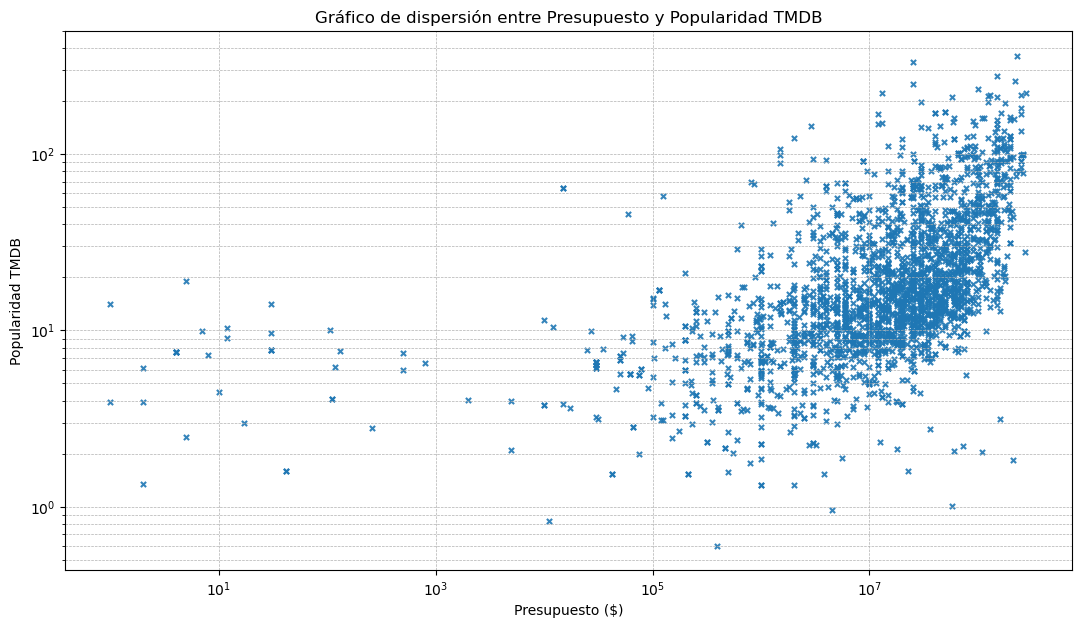

In [17]:
fig, ax = plt.subplots(figsize=(13,7))
scatter = ax.scatter(df1['budget'], df1['tmdb_popularity'], alpha=0.9, s=14, marker='x')
ax.set_xscale('log') 
ax.set_yscale('log')

ax.set_title('Gráfico de dispersión entre Presupuesto y Popularidad TMDB')
ax.set_xlabel('Presupuesto ($)')
ax.set_ylabel('Popularidad TMDB')
ax.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()


Se observa que hay datos que quedan por la parte superior 

In [18]:
high_popularity_movies = df1[df1['tmdb_popularity'] > 200]

# Mostramos la información de estas películas.
high_popularity_movies[['title', 'budget', 'tmdb_popularity']]


,title,budget,tmdb_popularity
670,The Conjuring,13000000.0,221.925
740,Legend,25000000.0,333.013
984,Avengers: Age of Ultron,280000000.0,222.087
1091,Pirates of the Caribbean: Dead Men Tell No Tales,230000000.0,363.540
1128,The Avengers,220000000.0,262.184
1187,Deadpool,58000000.0,213.011
1399,Harry Potter and the Chamber of Secrets,100000000.0,234.477
1563,Harry Potter and the Half-Blood Prince,250000000.0,216.755
1652,The Help,25000000.0,250.487
1707,Harry Potter and the Goblet of Fire,150000000.0,278.198


#### Análisis de la Relación entre Popularidad en TMDB y Votos en IMDB

El siguiente gráfico de dispersión ilustra la relación entre la popularidad de las películas en TMDB y la cantidad de votos que estas han recibido en IMDB. La escala logarítmica utilizada en ambos ejes ayuda a visualizar mejor la distribución de los datos, facilitando la identificación de tendencias entre la popularidad y la interacción del usuario en forma de votos. Esto puede ser indicativo de cómo la popularidad impacta o se correlaciona con la participación de los usuarios en términos de votación.


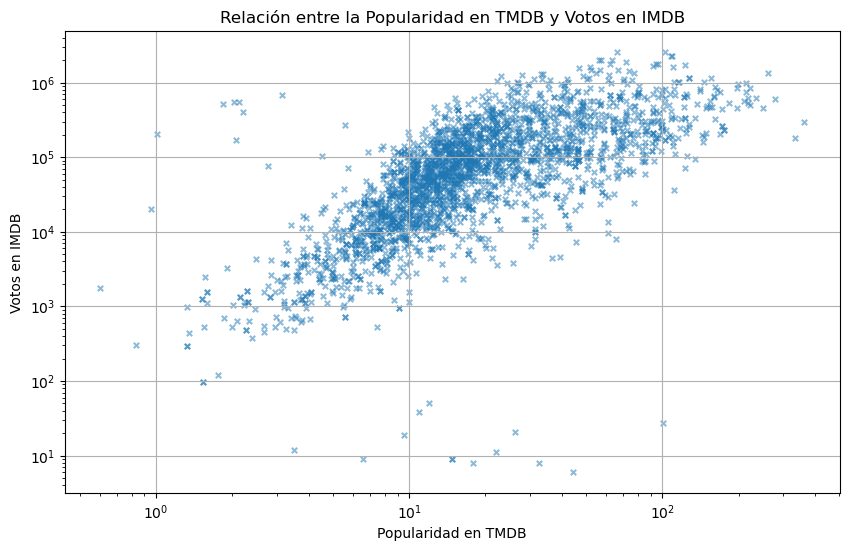

In [19]:
df1.dropna(subset=['tmdb_popularity', 'imdb_votes'])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df1['tmdb_popularity'], df1['imdb_votes'],  alpha=0.5, s=15, marker='x')
plt.title('Relación entre la Popularidad en TMDB y Votos en IMDB')
plt.xlabel('Popularidad en TMDB')
plt.ylabel('Votos en IMDB')
plt.xscale('log') 
plt.yscale('log')
plt.grid(True)
plt.show()



El gráfico de dispersión muestra la relación entre la popularidad de las películas en la plataforma TMDB y la cantidad de votos que estas reciben en IMDB. Observamos que:

- **Distribución de los datos**: La mayoría de los puntos se concentran en el rango inferior de popularidad y votos, sugiriendo que la mayoría de las películas tienen una popularidad moderada y un número correspondientemente moderado de votos en IMDB.
- **Tendencias visibles**: Existe una tendencia de que a medida que aumenta la popularidad en TMDB, también lo hacen los votos en IMDB, aunque esta relación no es uniformemente lineal.
- **Outliers**: Hay películas con baja popularidad en TMDB que reciben un número relativamente alto de votos en IMDB, así como películas altamente populares en TMDB que no alcanzan niveles extremadamente altos de votos en IMDB.

Este análisis sugiere que, aunque existe una correlación entre la popularidad en TMDB y los votos en IMDB, otros factores podrían influir en el número de votos que una película recibe en IMDB, como la calidad del contenido, el marketing o la base de usuarios de ambas plataformas.



In [20]:
correlation_pearson = df1[['tmdb_popularity', 'imdb_votes']].corr(method='spearman')
correlation_pearson


,tmdb_popularity,imdb_votes
tmdb_popularity,1.000000,0.748733
imdb_votes,0.748733,1.000000


El coeficiente de correlación entre `tmdb_popularity` y `imdb_votes` es de **0.748733**, lo cual indica una fuerte correlación positiva. Esto sugiere que generalmente, a mayor popularidad en TMDB, mayor es el número de votos que la película tiende a recibir en IMDB.

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Transformar datos para el modelo de regresión
X = df1[['imdb_votes']].values.reshape(-1, 1)
y = df1['tmdb_popularity'].values

# Ajustar el modelo de regresión
model = LinearRegression()
model.fit(X, y)

# Predecir popularidad ajustada
df1['adjusted_tmdb_popularity'] = model.predict(X)

# Crear un nuevo DataFrame para comparar
ajust_df = df1[['imdb_votes', 'tmdb_popularity', 'adjusted_tmdb_popularity']]

ajust_df.head()


,imdb_votes,tmdb_popularity,adjusted_tmdb_popularity
0,1538.0,1.585,17.248950
1,6961.0,3.270,17.591210
2,46010.0,56.947,20.055692
3,9465.0,7.019,17.749243
4,345658.0,18.124,38.967241


In [22]:
correlation_pearson = ajust_df[['adjusted_tmdb_popularity', 'tmdb_popularity']].corr(method='spearman')
correlation_pearson


,adjusted_tmdb_popularity,tmdb_popularity
adjusted_tmdb_popularity,1.000000,0.748733
tmdb_popularity,0.748733,1.000000


### 4) Visualización de Relaciones:

Tras realizar los análisis de correlacón y representar de forma gráfica se puede observar que **sí** exsiste una relación entre el presupuesto y la popularidad 